# Проект: предсказание оттока клиентов фитнес-клуба

### Содержание проекта
1. [Загрузка данных](#1)
2. [Исследовательский анализ данных (EDA)](#2)
3. [Модель прогнозирования оттока пользователей](#3)
4. [Кластеризация пользователей](#4)
5. [Выводы и  базовые рекомендации по работе с клиентами](#5)

In [1]:
#загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

### 1. Загрузка данных
<a id="1"></a>

In [2]:
path = 'C:/Users/rochev/Downloads/'

In [3]:
# открываем дата фрейм
gym = pd.read_csv(path +'gym_churn.csv')

In [4]:
gym.columns = gym.columns.str.lower()

In [5]:
# обзор данных
gym.sample(10)

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
2005,1,1,0,0,1,1,1,24,347.672290,1.0,2,2.687242,2.631576,0
1321,1,1,1,0,1,12,1,25,124.803305,12.0,3,1.793285,1.645836,0
665,0,0,1,0,0,12,0,26,121.181502,12.0,10,2.092475,2.004800,0
1332,0,1,0,0,1,1,1,26,108.022675,1.0,1,1.280953,1.117626,1
1584,1,1,1,0,1,1,0,26,81.252730,1.0,1,2.411779,1.626832,1
1640,0,1,1,0,1,12,1,31,232.271614,9.0,0,0.530804,0.578268,0
1410,1,1,0,0,1,1,0,27,34.715962,1.0,1,1.182604,1.762792,1
3279,1,0,1,1,1,1,0,28,127.449441,1.0,4,3.299562,3.414496,0
3038,0,1,0,0,1,1,0,30,311.915088,1.0,3,1.576665,1.626643,0
2532,1,1,1,1,1,6,0,28,3.700948,6.0,2,2.312165,2.279386,0


In [6]:
gym.shape

(4000, 14)

In [7]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [8]:
gym.duplicated().sum()

0

Нет пропусков, все признаки числовые

### 2. Исследовательский анализ данных (EDA)
<a id="2"></a>

In [9]:
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Теперь мы видим средние, медиану и стандартные отклонения по всем параметрам


In [10]:
# рассмотрим средние критериев по целевому показателю
df = gym.groupby(['churn'])[gym.drop('churn', axis=1).columns].mean()
df

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [11]:
df.shape

(2, 13)

##### Видим существенную разницу по всем стобцам кроме пола и  данных телефона.

In [12]:
# построим функцию для рассмотрения распределеия 
def func_draw(df):
    scaler = StandardScaler() # создаём объект класса scaler (стандартизатор)
    scaler.fit(df) # обучаем стандартизатор
    X_sc = scaler.transform(df) # преобразуем набор данных
    df_new = pd.DataFrame(data = X_sc, columns = [df.columns.tolist()])
    for feature in df_new.columns:
        sns.distplot(df_new[feature ], bins = 10)
        plt.title(feature)
        plt.show()

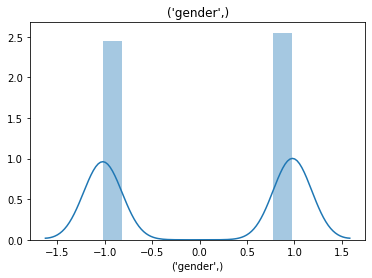

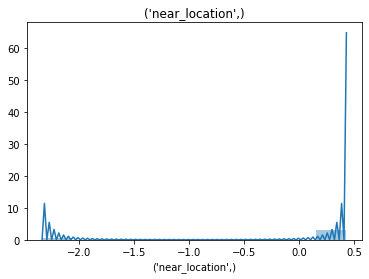

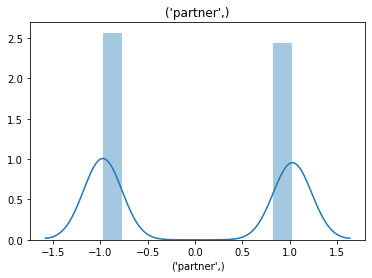

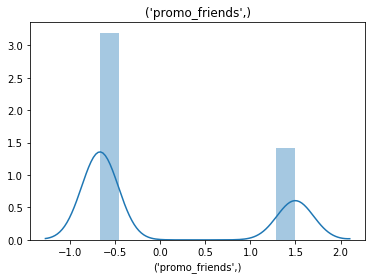

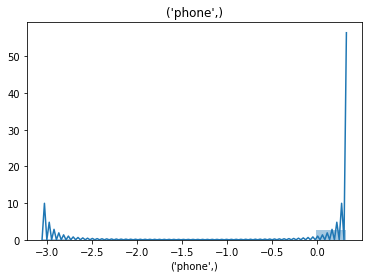

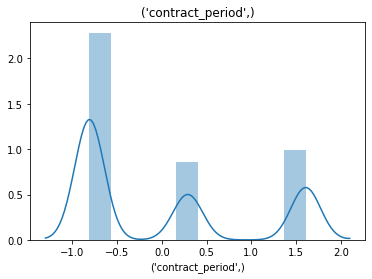

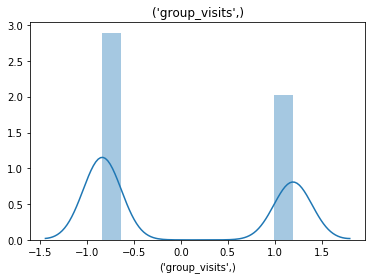

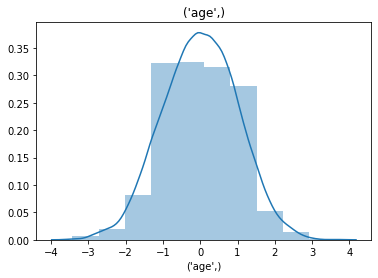

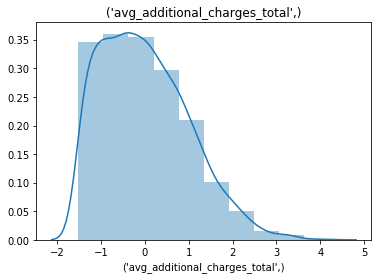

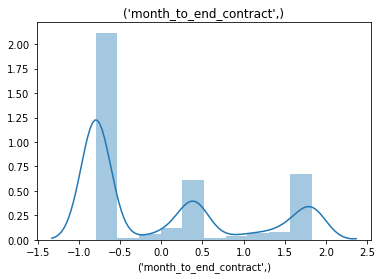

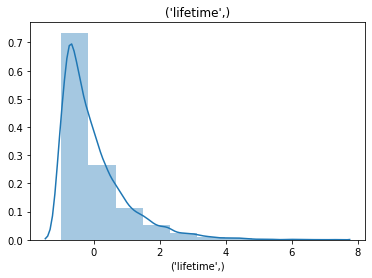

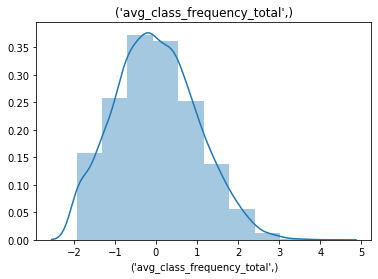

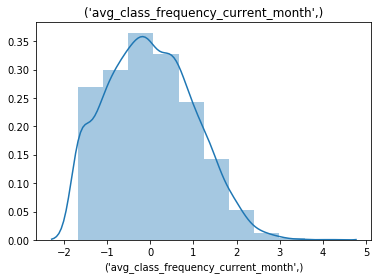

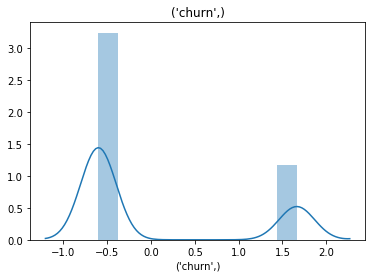

In [13]:
# взглянем на общие распределения
func_draw(gym)

**Распределенные критерии имееют выраженное смещение влево, кроме возраста
Категориальные признаки имеют равное распределение по полуи партнерам, остальные также имеют смещение  
также видим, что целевой показатель не сбалансирован**


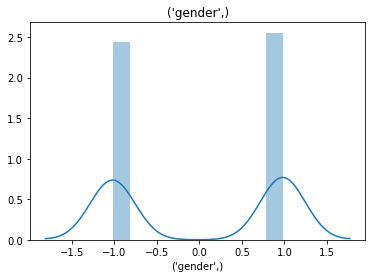

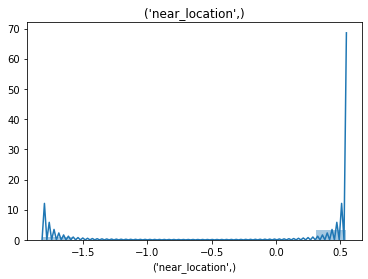

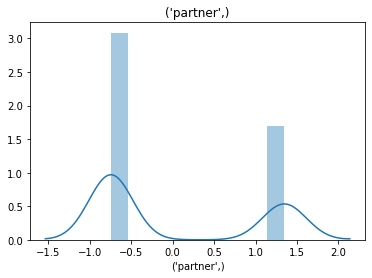

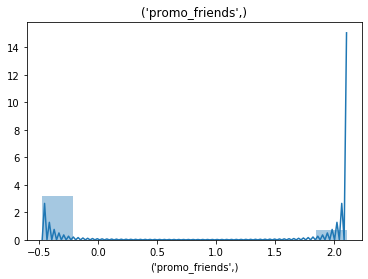

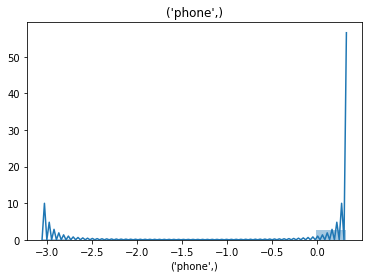

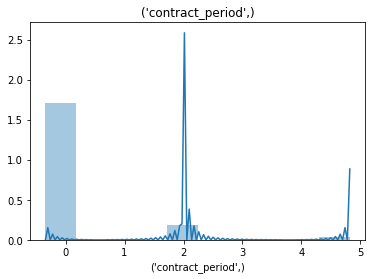

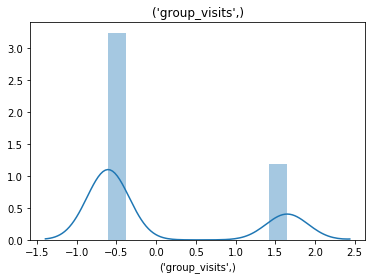

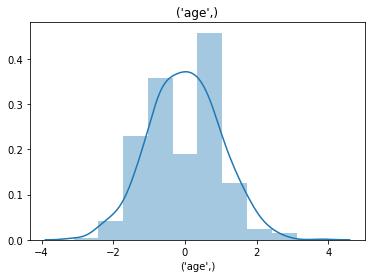

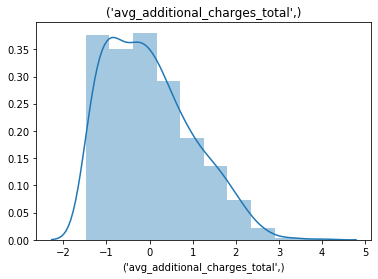

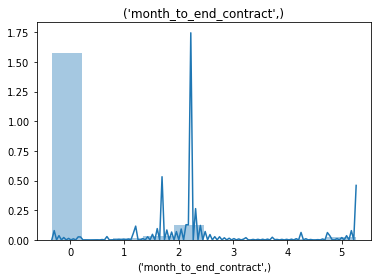

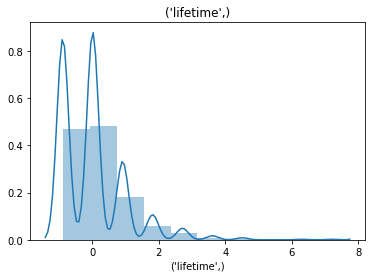

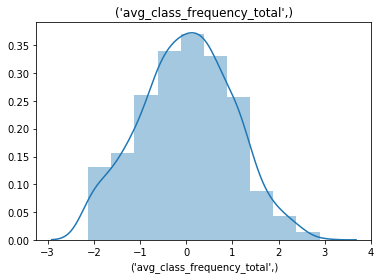

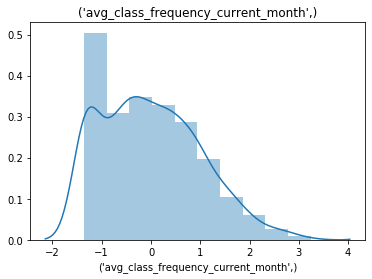

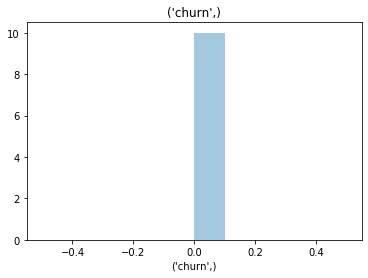

In [14]:
# рассмотрим распределеия churn = 1
df = gym.query('churn == 1')
func_draw(df)

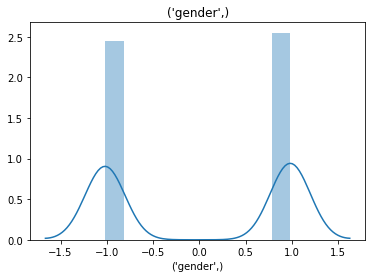

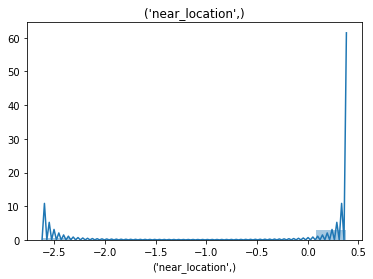

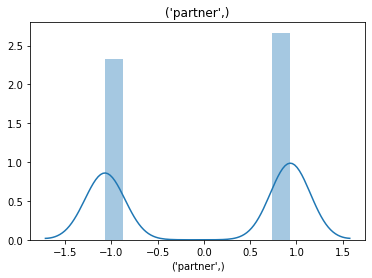

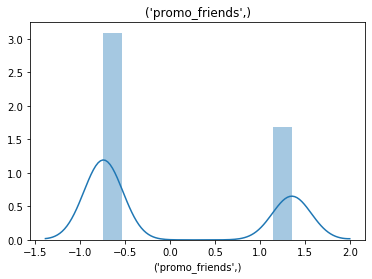

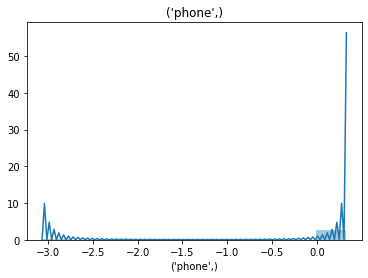

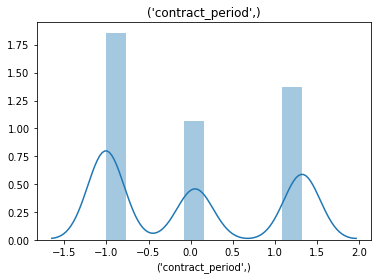

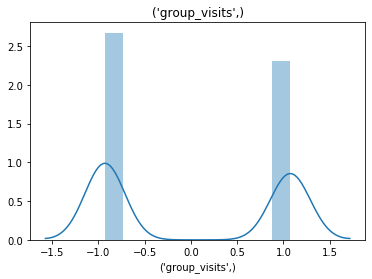

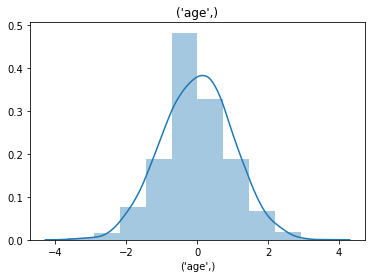

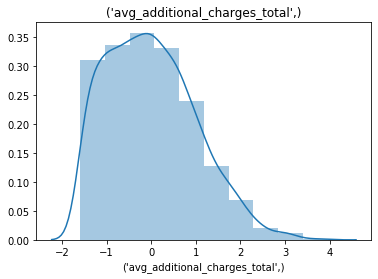

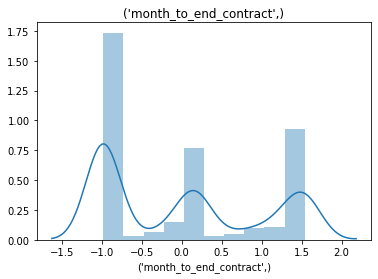

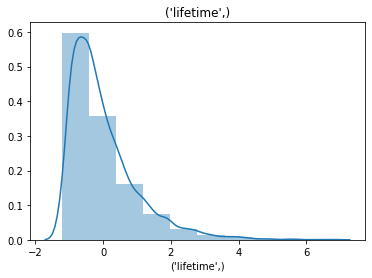

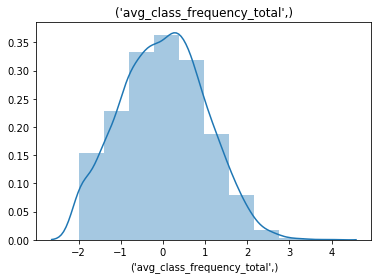

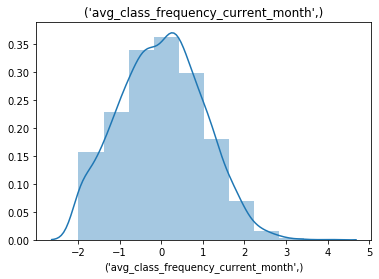

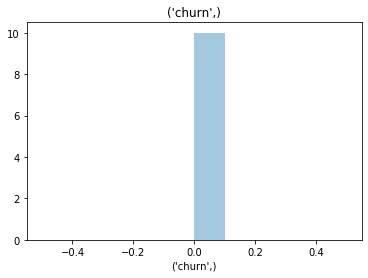

In [15]:
# рассмотрим распределеия churn = 0
df = gym.query('churn == 0')
func_draw(df)

In [16]:
# создадим словарь признков
columns = gym.drop('churn', axis=1).columns.tolist()
# и сделаем функцию отрисовки графиков
def func_pairdraw(column):
    sns.distplot(gym[gym['churn']==0][column], kde=False, norm_hist=True, bins = range(13), label='0')
    sns.distplot(gym[gym['churn']==1][column], kde=False, norm_hist=True, bins = range(13), label='1')
    plt.legend()
    plt.show()

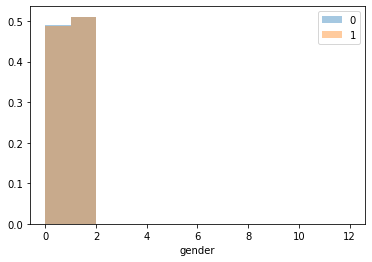

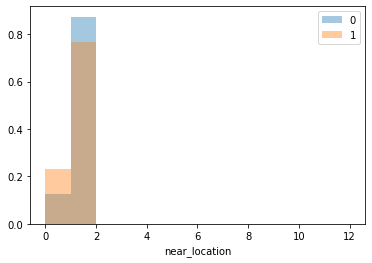

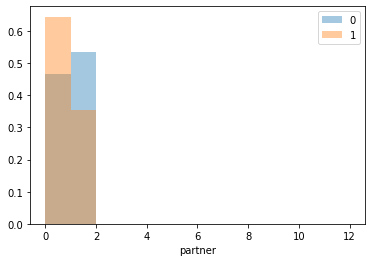

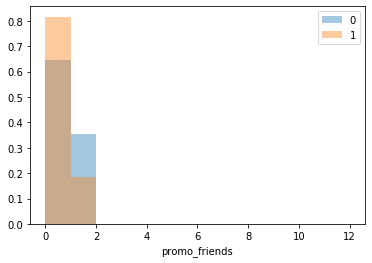

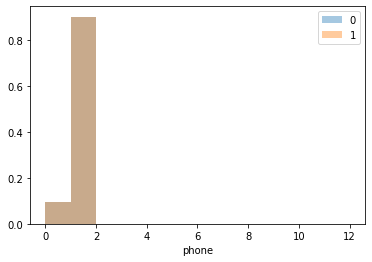

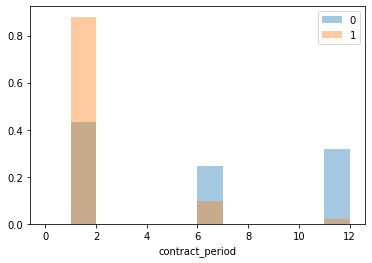

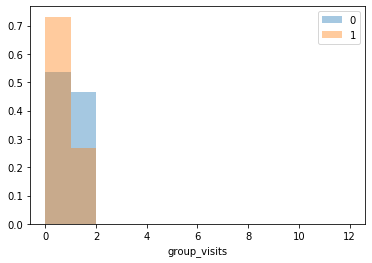

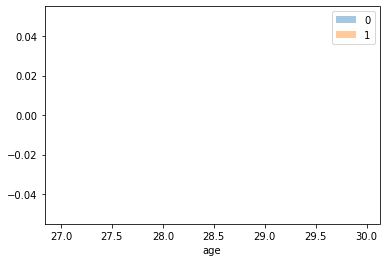

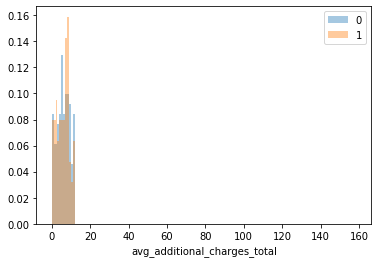

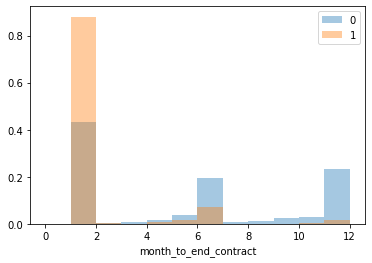

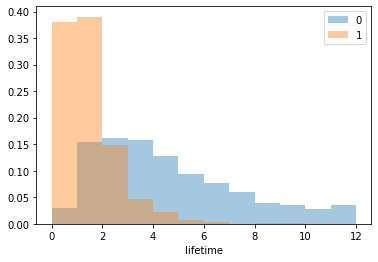

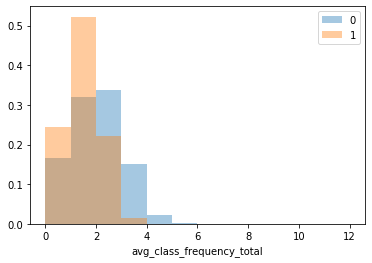

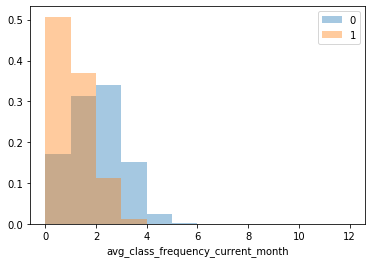

In [17]:
# сделаем сравнение показателй к разному целевому признаку более наглядным
for column in columns:
    func_pairdraw(column)

**При рассмотрении по целевому показателю мы имеем смещение распределений вправо, сразу хочется отметить прямую завимсмось отстака месяцев посещения, длинны контракта, наличия трудоустройства у партнеров, доп трат, срока посещения от  факта ухода**

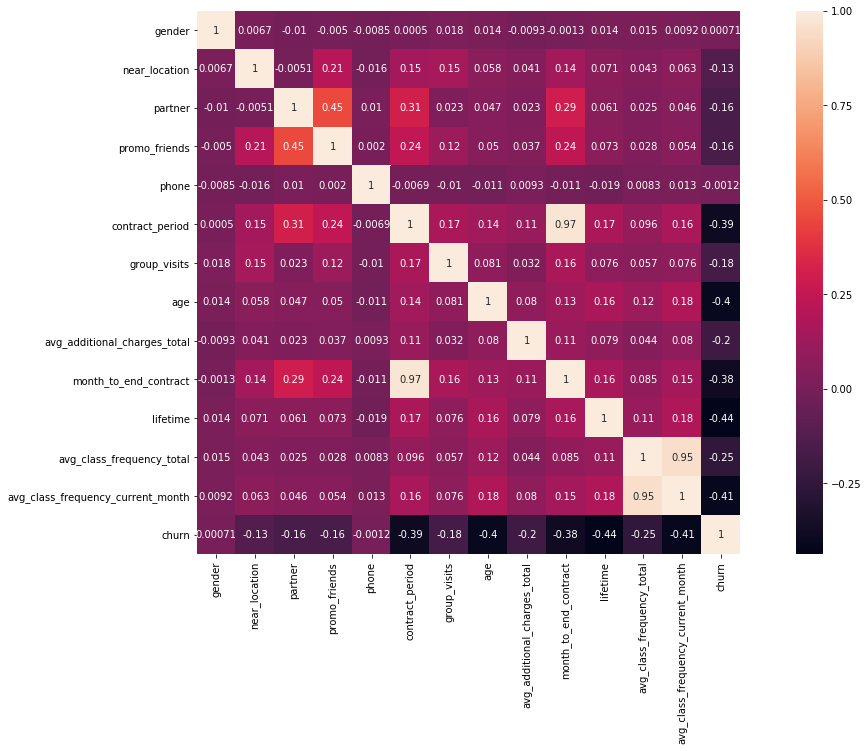

In [18]:
#вычисляем матрицу корреляций
cm = gym.corr() 
plt.figure(figsize=(20,10))
ax = sns.heatmap(cm, annot = True, square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) #корректировка "рваных" полей heatmap в последней версии библиотеки
plt.show()

**Мы видим сильную корреляцию между сроком абонемента и остатком (сюприз:-))  
А также по посещениям за год и пред месяц  
С целевой переменной все призгнаки имеют отриц корреляцию, в абсолютных значениях к значениям 0,44 приблизилсь возраст и срок абонемента**  

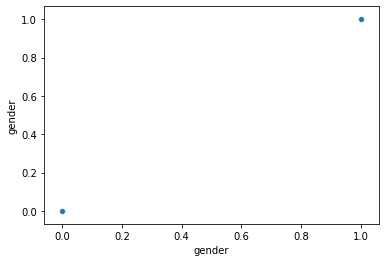

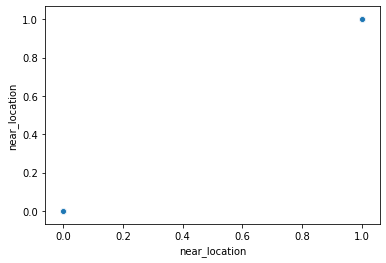

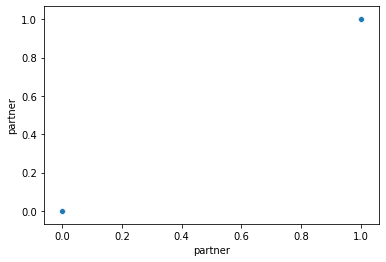

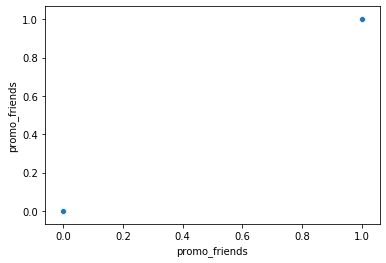

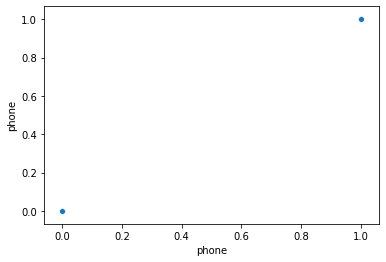

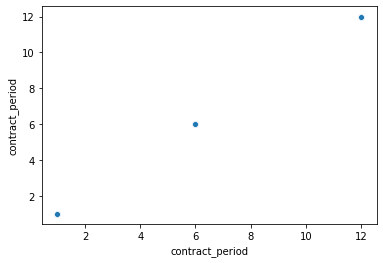

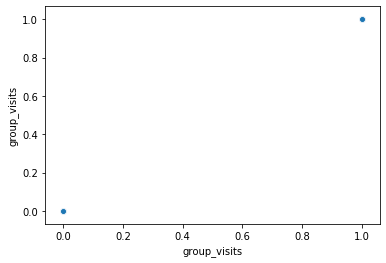

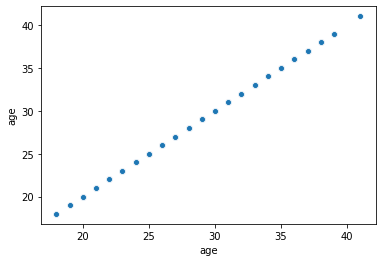

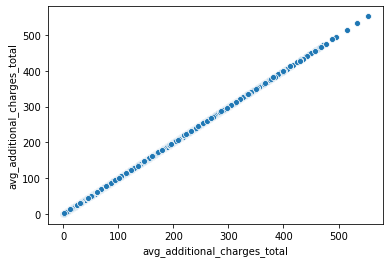

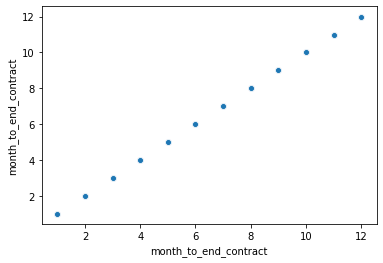

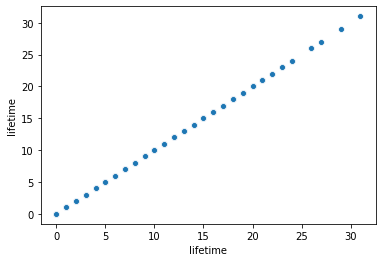

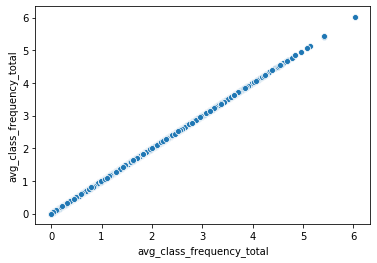

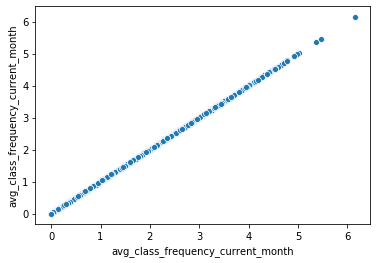

In [19]:
#построим попарные диаграммы рассеяния признак-целевая переменная для каждого признака
for col in gym.drop('churn', axis=1).columns:
    sns.scatterplot(gym[col], gym[col])
    plt.show()

##### Наибольшее распределние значений признаков, исходя из корреляции могут быть:
 - Avg_class_frequency_total
 - Avg_class_frequency_current_month (что то одно, тк они сильно коррелируют между собой
 - lfetime
 - Avg_class_frequency_total
 
 

### Шаг 3. Модель прогнозирования оттока пользователей
<a id="3"></a>

In [20]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = gym.drop('churn', axis=1)
y = gym['churn']

In [21]:
# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
# создадим объект класса StandardScaler и применим его к обучающей выборке
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train) #обучаем scaler и одновременно трансформируем матрицу для обучающей выборки
# применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

In [23]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))


In [24]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression()
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
# выведем все метрики
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Метрики для модели логистической регрессии:')

Метрики для модели логистической регрессии:
	Accuracy: 0.92
	Precision: 0.85
	Recall: 0.83


In [25]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) # Ваш код здесь
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)# Ваш код здесь
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]# Ваш код здесь
# выведем все метрики
print_all_metrics(y_test, rf_predictions, rf_probabilities,  title = 'Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.81


##### На основании полученных метрик мы видим одинаковую долю правильныхз ответов у каждой модели, также у логистической  регресии выше  точность и наиболее важое в нашем случае, полнота

### Шаг 4. Кластеризация пользователей
<a id="4"></a>

In [26]:
# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward')

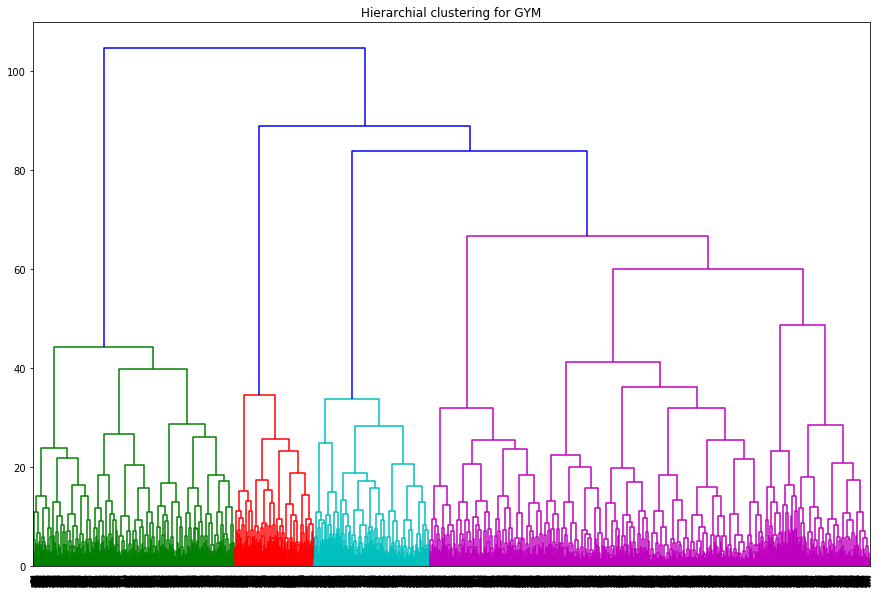

In [27]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()

##### Можем выделить от 2 и более кластеров.   В целом, по дендрограмме можно выделить 4-6 кластеров

In [28]:
# задаём модель k_means с числом кластеров 5
km =  KMeans(n_clusters = 5, random_state = 0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(X_sc)
# сохраняем метки кластера в поле нашего датасета
gym['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
gym.groupby(['cluster_km']).mean().sort_values('churn').reset_index()

,cluster_km,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100
2,1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
3,2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
4,3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263


In [29]:
# построим функцию гистограммы распределений критериев по кластерам
def func_cluster(column):
    sns.distplot(gym[gym['cluster_km']==0][column], kde=False, norm_hist=True, bins = range(13), label='0')
    sns.distplot(gym[gym['cluster_km']==1][column], kde=False, norm_hist=True, bins = range(13), label='1')
    sns.distplot(gym[gym['cluster_km']==2][column], kde=False, norm_hist=True, bins = range(13), label='2')
    sns.distplot(gym[gym['cluster_km']==3][column], kde=False, norm_hist=True, bins = range(13), label='3')
    sns.distplot(gym[gym['cluster_km']==4][column], kde=False, norm_hist=True, bins = range(13), label='4')
    plt.legend()
    plt.show()

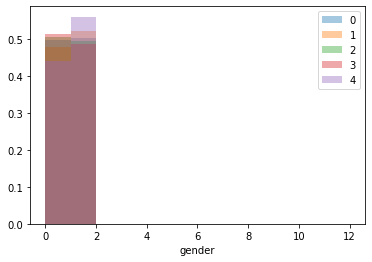

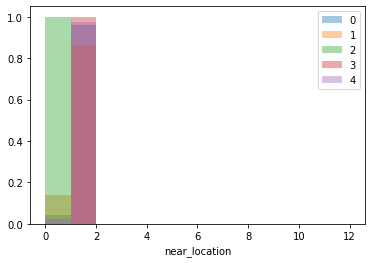

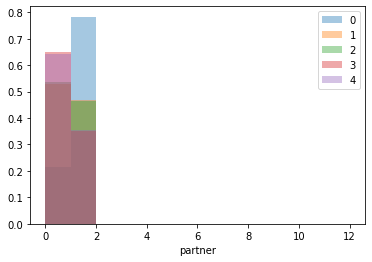

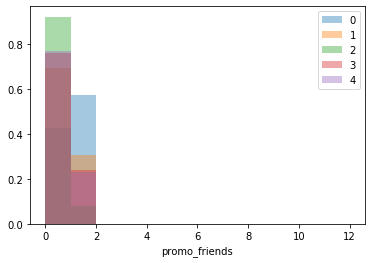

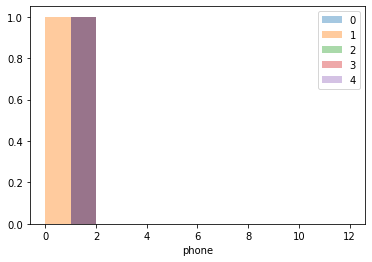

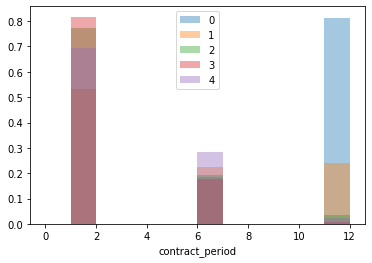

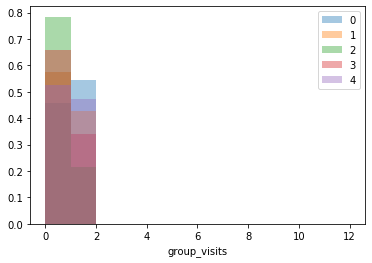

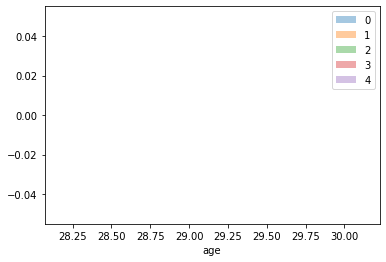

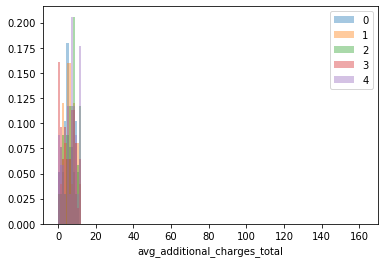

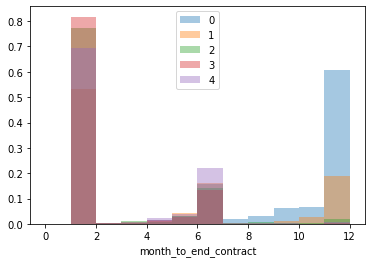

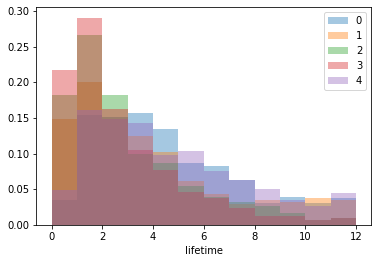

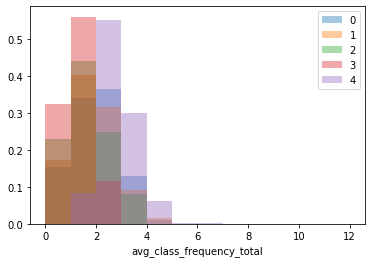

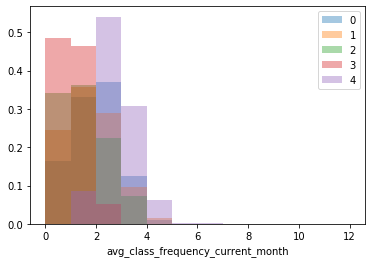

In [30]:
# построим гистограммы распределений критериев по кластерам
for column in columns:
    func_cluster(column)

### На сонвоании распределения значений показателей  по кластерам можем сделать следующие выводы:  
 **- пол, возраст и близость от клуба не влияют на отток**
### Имеют влияние следуюшие показатели:  
 **- сотрудник компании-партнёра клуба реже уходит**  
 **- тот кто пришел по промо от друга**  
 **- тот кто имеет долгий абонемент**   
 **- кто чаще посещает групповые занятия**  
 **- кто больше тратит доаолнительно**  
 **- у кого больше неиспольз месяцев по абонементу**  
 **- кто ходит больше раза в неделю** 

In [31]:
# посчитаем всего клиентов по кластерам
df = gym.groupby(['cluster_km']).agg({'churn':'count'}).reset_index().sort_values('churn').rename(columns = {'churn': 'count'})
df

,cluster_km,count
1,1,385
2,2,505
4,4,837
0,0,1011
3,3,1262


In [32]:
# посчитаем клиентов со значеним оттока 1
df1 = gym.query('churn == 1').groupby(['cluster_km']).agg({'churn':'count'}).reset_index().sort_values('churn')
df1

,cluster_km,churn
0,0,28
4,4,57
1,1,103
2,2,224
3,3,649


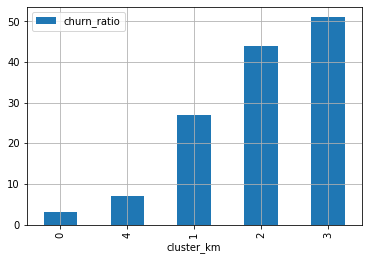

In [33]:
# посчитаем процент ухода по кластерам и выведем диаграмму
df['churn_ratio'] = (df1['churn']/df['count']).round(2)*100
df.sort_values('churn_ratio').plot(x = 'cluster_km', y = 'churn_ratio', kind = 'bar', grid = True)
plt.show()

### Самый большой отток в 3 кластере, самый малый в 0.

### Шаг 5. Выводы и  базовые рекомендации по работе с клиентами
<a id="5"></a>

 **1.  Активно наращивать компании партнёры клуба**  
 **2.  Проводить промо-акции 'приведи друга'**  
 **3.  Мотивировать на более длительный контракты**   
 **4.  Отслеживать посещения групповых занятий, при снижении показателя менее 0,5, клиент готов уйти**  
 **5.  Предоставлять условия для доп трат в виде сопутствующих товаров и услуг**  
 **6.  При снижении частоты посещений до 1 раза в неделю рассылать мотивирующие предложения** 